In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [2]:
data = pd.read_fwf('copper-new.txt', sep=" ", header=None, names=["y", "x"])
x = np.array(data['x'])
y = np.array(data['y'])
data.head()

,y,x
0,0.591,24.41
1,4.703,54.98
2,9.470,89.57
3,11.615,114.26
4,12.970,133.61


In [3]:
# Part 1
X = x.reshape(-1,1)
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [4]:
print("Slope = "+str(linreg.coef_[0]))
print("Intercept = "+str(linreg.intercept_))

Slope = 0.021283144237618158
Intercept = 7.384127393045498


In [5]:
linreg_pred = linreg.predict(X)
mse = mean_squared_error(linreg_pred,y)
print("MSE = "+str(mse))

MSE = 10.520693033283345


In [6]:
# Part 2

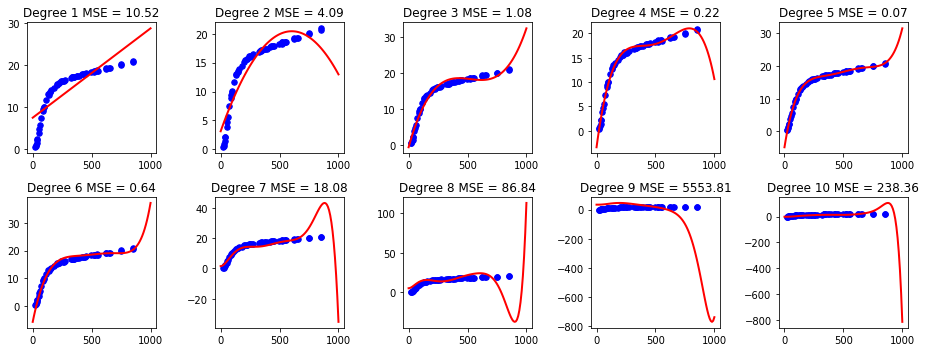

In [7]:
# Part 3
lw = 2
x_plot = np.linspace(0, 1000, 101)
X_plot = x_plot[:, np.newaxis]
degree = [1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(13,5))
for i in degree:
    model = make_pipeline(PolynomialFeatures(i), Ridge(solver='svd'))
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    poly_pred = model.predict(X)
    mse = round(mean_squared_error(poly_pred,y),2)
    plt.subplot(2,5,i)
    plt.scatter(x, y, color='blue', s=30, marker='o', label="training points")
    plt.plot(x_plot, y_plot, linewidth=lw,c='red')
    plt.title("Degree "+str(i)+" MSE = "+str(mse))
plt.tight_layout()

Lambda = 34: CV Error = 0.107
Lambda = 35: CV Error = 0.102
Lambda = 36: CV Error = 0.098
Lambda = 37: CV Error = 0.096
Lambda = 38: CV Error = 0.094
Lambda = 39: CV Error = 0.093
Lambda = 40: CV Error = 0.094
Lambda = 41: CV Error = 0.096
Lambda = 42: CV Error = 0.098
Lambda = 43: CV Error = 0.102
Lambda = 44: CV Error = 0.107


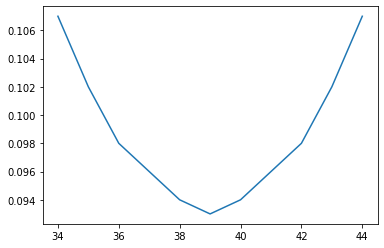

In [8]:
lambs = np.arange(34, 45, 1).tolist()
cves = []
for i in range(len(lambs)):
    kf = KFold(n_splits=5)
    kf.get_n_splits(X)
    mse = 0
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        poly = make_pipeline(PolynomialFeatures(5), Ridge(solver='svd',alpha=lambs[i]))
        poly.fit(X_train, y_train)
        poly_pred = poly.predict(X_test)
        mse += (1/5)*mean_squared_error(poly_pred,y_test)
    cves.append(round(mse,3))
    print("Lambda = "+str(lambs[i])+": CV Error = "+str(cves[i]))
plt.figure()
plt.plot(lambs,cves)
plt.show()

In [9]:
# Part 4
test = np.array(400).reshape(-1,1)
lin400_pred = linreg.predict(test)
print("Linear Prediction = "+str(round(lin400_pred[0],3)))

poly = make_pipeline(PolynomialFeatures(5), Ridge(solver='svd',alpha=39))
poly.fit(X, y)
poly400_pred = poly.predict(test)
print("Polynomial RR Prediction = "+str(round(poly400_pred[0],3)))

Linear Prediction = 15.897
Polynomial RR Prediction = 17.429
